GitHub Posting:

💻 - **https://github.com/Felipegg2/Python_Project**

## Web-Scraping: Creation of the CSV file

In [1]:
# Importing of libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib.parse import urlparse
import numpy as np

In [2]:
# Determination of URL to do a web-scraping project
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_Canada'

In [3]:
#With requests.get we make sure the web page works and it is available to connect it. If the answer is 200, the page is right.
#You could review the kinds of URL answer in the next link: https://www.rfc-editor.org/info/rfc9110.
#The web page was correctly connected.

page = requests.get(url)
page

<Response [200]>

In [4]:
# All information on the web page will be in the "soup" variable.

soup = BeautifulSoup(page.text, 'html.parser')

In [5]:
# To print information inside the "soup" variable.

print (soup)

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-typography-survey-disabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in Canada - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-featu

In [7]:
# The original web page could have more than one table. In this case, it was chosen for the "2019 Forbes list". It is table 1 on the web page.

table=soup.find_all('table')[1]
print (table)

<table class="wikitable sortable" style="text-align:right;">
<tbody><tr>
<th align="center">Rank
</th>
<th align="center">Forbes <br/>2000 rank
</th>
<th align="center">Name
</th>
<th align="center">Headquarters
</th>
<th align="center">Revenue<br/>(billions <br/>US$)
</th>
<th align="center">Profit<br/>(billions <br/>US$)
</th>
<th align="center">Assets<br/>(billions <br/>US$)
</th>
<th align="center">Value<br/>(billions <br/>US$)
</th>
<th align="center">Industry
</th></tr>
<tr>
<td>1
</td>
<td>41
</td>
<td align="left"><a href="/wiki/Royal_Bank_of_Canada" title="Royal Bank of Canada">Royal Bank of Canada</a>
</td>
<td align="left">Toronto
</td>
<td>46.3
</td>
<td>9.6
</td>
<td>1,040.3
</td>
<td>114.9
</td>
<td align="left">Banking
</td></tr>
<tr>
<td>2
</td>
<td>46
</td>
<td align="left"><a href="/wiki/Toronto-Dominion_Bank" title="Toronto-Dominion Bank">Toronto-Dominion Bank</a>
</td>
<td align="left">Toronto
</td>
<td>42.5
</td>
<td>8.7
</td>
<td>1,007.0
</td>
<td>103.8
</td>
<td 

In [8]:
# To filter lines (th) where the column titles are

table_titles = table.find_all('th')
print (table_titles)

[<th align="center">Rank
</th>, <th align="center">Forbes <br/>2000 rank
</th>, <th align="center">Name
</th>, <th align="center">Headquarters
</th>, <th align="center">Revenue<br/>(billions <br/>US$)
</th>, <th align="center">Profit<br/>(billions <br/>US$)
</th>, <th align="center">Assets<br/>(billions <br/>US$)
</th>, <th align="center">Value<br/>(billions <br/>US$)
</th>, <th align="center">Industry
</th>]


In [9]:
#Set titles of dataframe

table_titles = [title.text.strip() for title in table_titles]
print (table_titles)

['Rank', 'Forbes 2000 rank', 'Name', 'Headquarters', 'Revenue(billions US$)', 'Profit(billions US$)', 'Assets(billions US$)', 'Value(billions US$)', 'Industry']


In [10]:
# Creating a dataframe and adding titles to that

df = []
df = pd.DataFrame(columns=table_titles)
df

,Rank,Forbes 2000 rank,Name,Headquarters,Revenue(billions US$),Profit(billions US$),Assets(billions US$),Value(billions US$),Industry


In [11]:
# Select lines with information about the table's rows.

company_data = table.find_all('tr')

In [12]:
# Verifying that the information has been gotten.

print (company_data)

[<tr>
<th align="center">Rank
</th>
<th align="center">Forbes <br/>2000 rank
</th>
<th align="center">Name
</th>
<th align="center">Headquarters
</th>
<th align="center">Revenue<br/>(billions <br/>US$)
</th>
<th align="center">Profit<br/>(billions <br/>US$)
</th>
<th align="center">Assets<br/>(billions <br/>US$)
</th>
<th align="center">Value<br/>(billions <br/>US$)
</th>
<th align="center">Industry
</th></tr>, <tr>
<td>1
</td>
<td>41
</td>
<td align="left"><a href="/wiki/Royal_Bank_of_Canada" title="Royal Bank of Canada">Royal Bank of Canada</a>
</td>
<td align="left">Toronto
</td>
<td>46.3
</td>
<td>9.6
</td>
<td>1,040.3
</td>
<td>114.9
</td>
<td align="left">Banking
</td></tr>, <tr>
<td>2
</td>
<td>46
</td>
<td align="left"><a href="/wiki/Toronto-Dominion_Bank" title="Toronto-Dominion Bank">Toronto-Dominion Bank</a>
</td>
<td align="left">Toronto
</td>
<td>42.5
</td>
<td>8.7
</td>
<td>1,007.0
</td>
<td>103.8
</td>
<td align="left">Banking
</td></tr>, <tr>
<td>3
</td>
<td>87
</td>
<t

In [13]:
# Set rows of dataframe. [1:] Indicating that we will need the information after row 1.

for row in company_data[1:]:
    row_data = row.find_all('td')
    company_row_data = [data.text.strip() for data in row_data]

    length = len(df)
    df.loc[length] = company_row_data

In [14]:
# Print a head test only to check if the dataframe is complete and it has all the information.

df.head()

,Rank,Forbes 2000 rank,Name,Headquarters,Revenue(billions US$),Profit(billions US$),Assets(billions US$),Value(billions US$),Industry
0,1,41,Royal Bank of Canada,Toronto,46.3,9.6,"1,040.3",114.9,Banking
1,2,46,Toronto-Dominion Bank,Toronto,42.5,8.7,"1,007.0",103.8,Banking
2,3,87,Scotiabank,Toronto,32.4,6.4,787.5,67.1,Banking
3,4,118,Brookfield Asset Management,Toronto,57.6,3.6,256.3,46.0,Finance
4,5,134,Bank of Montreal,Montreal,26.2,4.6,614.2,50.4,Banking


In [15]:
# To change the type of data from string to float in some columns.

df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce')
df['Forbes 2000 rank'] = pd.to_numeric(df['Forbes 2000 rank'], errors='coerce')
df['Revenue(billions US$)'] = pd.to_numeric(df['Revenue(billions US$)'], errors='coerce')
df['Profit(billions US$)'] = pd.to_numeric(df['Profit(billions US$)'], errors='coerce')
df['Value(billions US$)'] = pd.to_numeric(df['Value(billions US$)'], errors='coerce')

In [16]:
# Some values did not change from string to float type. We must approximate those to the mean of the sampling.

df['Profit(billions US$)'].fillna(df['Profit(billions US$)'].mean(),inplace=True)

In [17]:
# To check which type of information each column is.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   56 non-null     int64  
 1   Forbes 2000 rank       56 non-null     int64  
 2   Name                   56 non-null     object 
 3   Headquarters           56 non-null     object 
 4   Revenue(billions US$)  56 non-null     float64
 5   Profit(billions US$)   56 non-null     float64
 6   Assets(billions US$)   56 non-null     object 
 7   Value(billions US$)    56 non-null     float64
 8   Industry               56 non-null     object 
dtypes: float64(3), int64(2), object(4)
memory usage: 4.4+ KB


In [18]:
# Exporting dataframe to csv file ---------------
# To find the new CSV file it is neccesary refresh your files in the Google collaborative menu.
# Please do it.

df.to_csv(r'largest companies in Canada.csv', index = False)

## Data visualization

In [19]:
# Importing libraries to create graphic charts

import matplotlib.pyplot as plt
import seaborn as sns

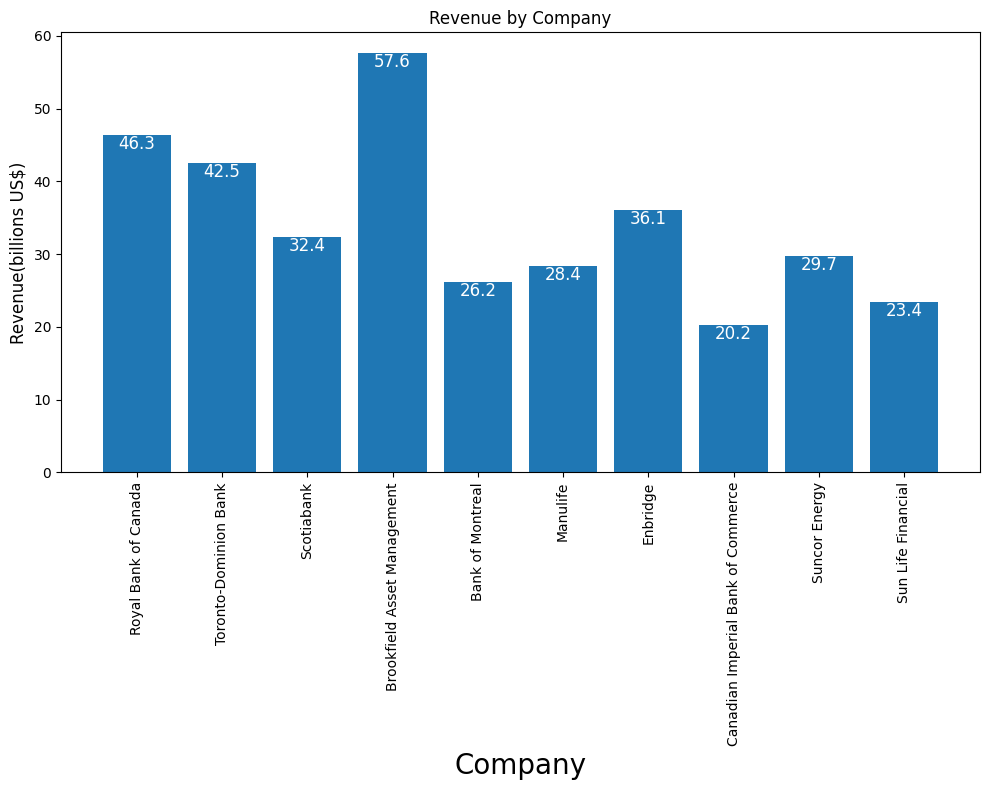

In [21]:
# Bar plot chart

plt.bar(df.head(10)['Name'], df.head(10)['Revenue(billions US$)'])
plt.xlabel('Company', size='20')
plt.ylabel('Revenue(billions US$)', size='12')
plt.title('Revenue by Company')
# Chart size
plt.rcParams.update({'figure.figsize':(12,8), 'figure.dpi':100})
# Companies' name rotation
plt.xticks(rotation=90)
plt.tight_layout()

# Labels for each bar
for x, y in zip(df.head(10)['Name'], df.head(10)['Revenue(billions US$)']):
    plt.text(x, y, str(y), ha='center', va='top', rotation=0, color='White', size='12')

plt.show()

In [22]:
# This shows the correlation rate between values and profit of companies.

corr = df['Value(billions US$)'].corr(df['Profit(billions US$)'])
print (corr)

# The correlation between these variables was 0.865.
# Signifying a strong positive relationship between the data in both of them.

0.8654496046878501


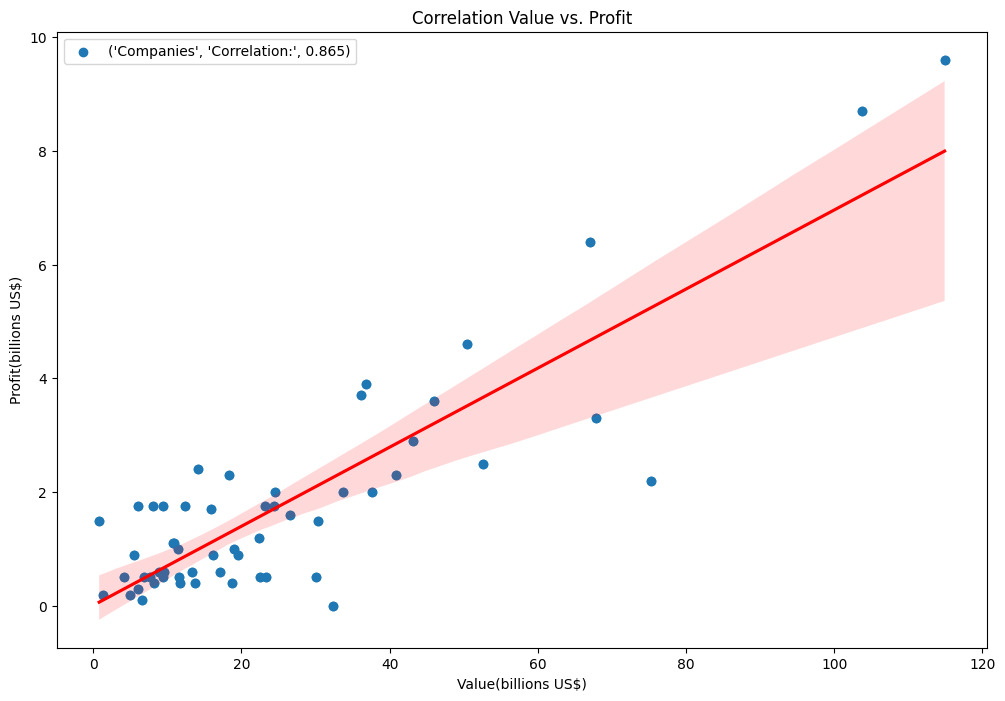

In [23]:
# Scatter plot chart

plt.scatter(df['Value(billions US$)'], df['Profit(billions US$)'], label= ('Companies', 'Correlation:' ,(round(corr,3))))
plt.xlabel('Value(billions US$)')
plt.ylabel('Profit(billions US$)')
plt.title('Correlation Value vs. Profit')
sns.regplot(x=df['Value(billions US$)'], y=df['Profit(billions US$)'], line_kws={"color":"r"})
plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})
plt.legend()
plt.show()


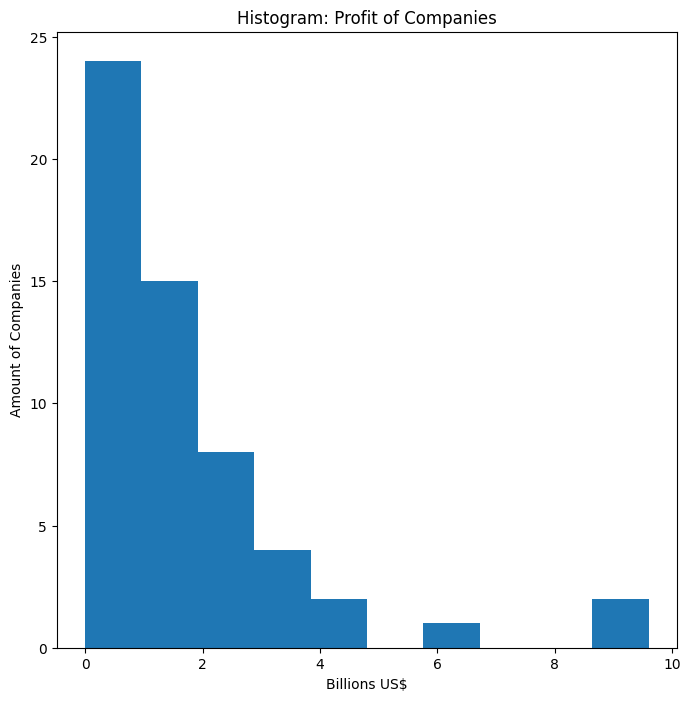

In [24]:
# This histogram shows how the profits are distributed. More than 30 companies have profits lower than 2 US Billion.

plt.hist(df['Profit(billions US$)'], bins=10)
plt.xlabel('Billions US$')
plt.ylabel('Amount of Companies')
plt.title('Histogram: Profit of Companies')
plt.show()


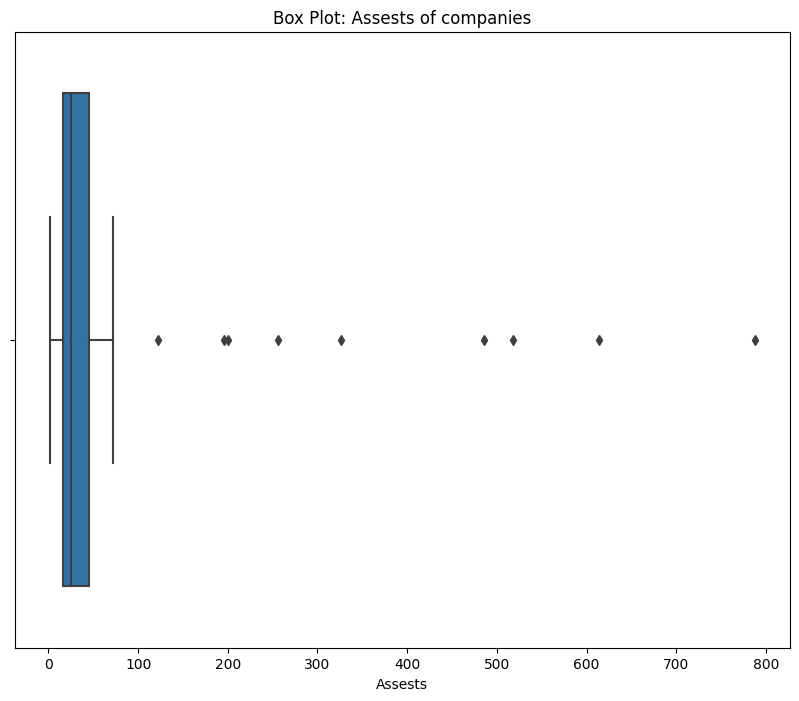

In [27]:
# Box plot chart


# To change the type of data from string to float in some columns.
df['Assets(billions US$)'] = pd.to_numeric(df['Assets(billions US$)'], errors='coerce')

sns.boxplot(x=df['Assets(billions US$)'])
plt.rcParams.update({'figure.figsize':(12,8), 'figure.dpi':100})
plt.xlabel('Assests')
plt.title('Box Plot: Assests of companies')
plt.show()

## Thanks for your visit!



## Contributions to this project are welcome. If you have ideas for improvements or additional features, feel free to contact me. 🚀




